In [1]:
from src import unpickle 
from src import train_category
from importlib import reload
from sklearn import tree as t
import numpy as np
import src.game as g


long_key, questions, grading_Key,\
keys2trait, Trait_dict_keys, Trait_dict_questions,\
graded_df, percentile_df, traits_df= unpickle.Load_pickled_files()

The Fun Part:

In [45]:
#set up the target and the 
y = percentile_df['Conscientiousness-C4'].values*100
y = [int(x) for x in y]
X = questions.values



reload(train_category)
# train the model

model,X_test,y_test = train_category.train_category(X,y,traits_df,2)

#export the tree
t.export_graphviz(model,out_file='tree.dot') 

print(np.mean(np.abs(model.predict(X_test)-y_test)))

#create the tree object
tree = model.tree_
# play the quiz

15.204539047045152


ValueError: invalid literal for int() with base 10: 'Put little time and effort into my work.'

In [83]:
reload(g)
quiz_openness = g.Quiz()
df = quiz_openness.play_game(tree,long_key,questions)

Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 


Put little time and effort into my work. 
Answer needs to be an integer between 1 & 5
Put little time and effort into my work. 2
Do just enough work to get by. 22
Answer needs to be an integer between 1 & 5
Do just enough work to get by. 2
Go straight for the goal. 2
Fall in the 37.683% percentile of this trait which correponds to node: 6


In [84]:
df.sum(axis = 1)

0    6.0
dtype: float64

In [85]:
reload(g)
df2 = quiz_openness.play_game(tree,long_key,questions,(True,df))

Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 


Fall in the 37.683% percentile of this trait which correponds to node: 6


## Visualization

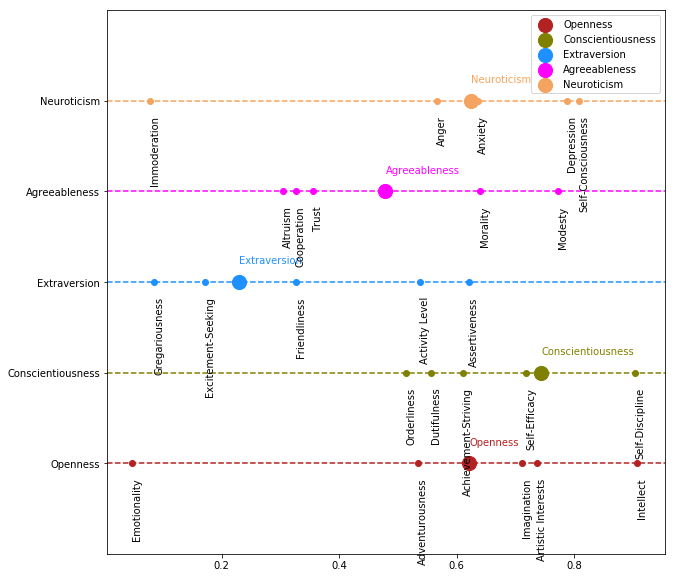

In [218]:
user = questions.sample(1)
user_id = user.index
colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']

_, ax = plt.subplots(1,1,figsize=(10,10))
import pandas as pd
height = 0
count = 0
Y_ticks = []
for Trait,facets in Trait_dict_keys.items():
    color = colors[count]
    height += 2
    count +=1
    
    
    
    
    for facet in facets:
        #names.append(Trait+'-'+facet)
        name = Trait+'-'+facet
        x = percentile_df.loc[user_id,name]
        plt.scatter(x,height,color = color)
        xy = (x,height -1/2)
        facet_name = keys2trait[facet][1]
        ax.annotate(facet_name, xy=xy, xytext=xy,rotation = 90)
    ax.axhline(height,0,1,ls = '--',c = color)
    
    x = traits_df.loc[user_id,Trait]
    facet_name = keys2trait[facet][0]
    plt.scatter(x,height,color = color,s = 200,label = facet_name )
    xy = (x,height +.4)
    ax.annotate(facet_name, xy=xy, xytext=xy, rotation = 0, color = color)
    Y_ticks.append(Trait)
        
ax.set_ylim([0,12])
ax.set_yticks(range(2,12,2))
ax.set_yticklabels(Y_ticks);
plt.legend()

In [87]:
percentile_df['Openness-O1'].values


array([0.75909174, 0.12934412, 0.89299149, ..., 0.93407677, 0.50159122,
       0.93407677])

In [48]:
from graphviz import Source

In [83]:
file = open("tree.dot", 'r')#READING DOT FILE
text=file.read()
for line in text.split('[label'):
    
    print('-'*50)
    if line[0:4] == '="X[':
        
        print(line[2:8])
        
        #print(line)
t2[4:7]
t2
# Source(text)

--------------------------------------------------
--------------------------------------------------
X[289]
--------------------------------------------------
X[259]
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
X[229]
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


['digraph Tree {\nnode [shape=box] ;\n0 ',
 '="X[289] <= 4.5\\nmse = 837.657\\nsamples = 102949\\nvalue = 49.441"] ;\n1 ',
 '="X[259] <= 3.5\\nmse = 545.034\\nsamples = 63830\\nvalue = 35.142"] ;\n0 -> 1 ',
 'distance=2.5, labelangle=45, headlabel="True"] ;\n2 ',
 '="mse = 350.487\\nsamples = 37294\\nvalue = 24.36"] ;\n1 -> 2 ;\n3 ',
 '="mse = 425.474\\nsamples = 26536\\nvalue = 50.295"] ;\n1 -> 3 ;\n4 ',
 '="X[229] <= 4.5\\nmse = 437.121\\nsamples = 39119\\nvalue = 72.773"] ;\n0 -> 4 ',
 'distance=2.5, labelangle=-45, headlabel="False"] ;\n5 ',
 '="mse = 449.297\\nsamples = 14770\\nvalue = 58.795"] ;\n4 -> 5 ;\n6 ',
 '="mse = 239.319\\nsamples = 24349\\nvalue = 81.252"] ;\n4 -> 6 ;\n}']

Now run: neato -Tps grid.dot >grid.ps


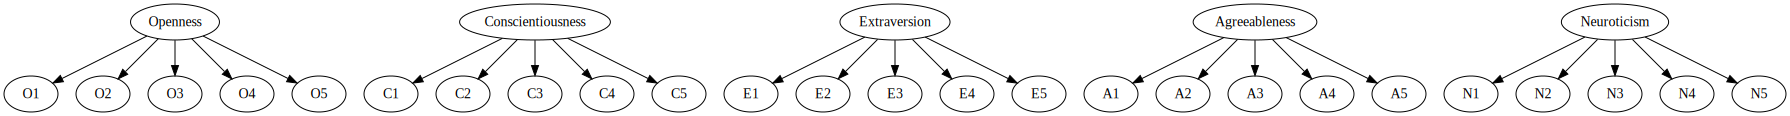

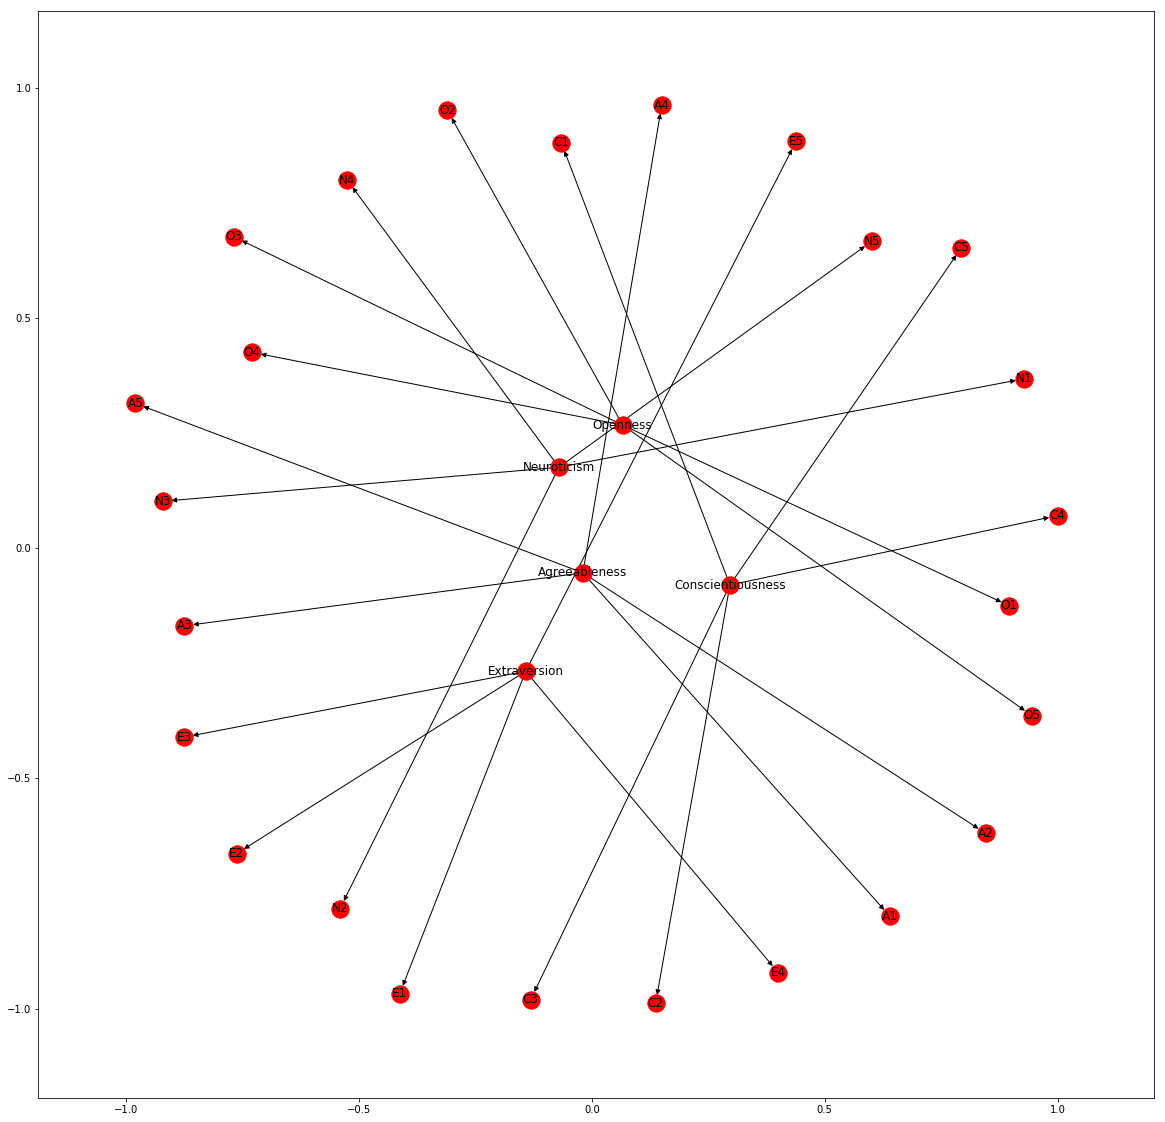

In [25]:
import networkx as nx
from graphviz import Source
import matplotlib.pyplot as plt
plt.subplots(1,1,figsize = (20,20))
D=nx.DiGraph(Trait_dict_questions) 
nx.draw_networkx(D)
D.nodes

import pydot
from networkx.drawing.nx_pydot import write_dot
G = nx.grid_2d_graph(5, 5)  # 5x5 grid
write_dot(D, "grid.dot")
print("Now run: neato -Tps grid.dot >grid.ps")
file = open("grid.dot", 'r')#READING DOT FILE
text=file.read()
Source(text)

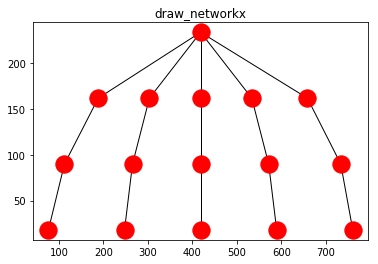

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

G.add_node("ROOT")

for i in range(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos=nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos, with_labels=False, arrows=False)

In [33]:
from sklearn.manifold import TSNE
q2 = questions.sample(2000)

In [41]:
model = TSNE(learning_rate = 10,early_exaggeration = 50)
x = model.fit_transform(q2)


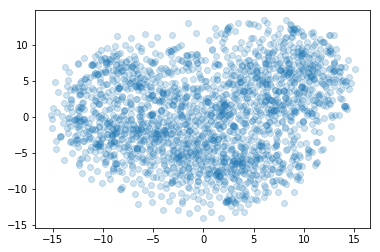

In [44]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],alpha = .21)
